# Desiree's scratch pad

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
import math

from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
import sklearn.preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.preprocessing import LabelEncoder

import Prepare as p

import datetime

## Acquire Data

In [2]:
df = pd.read_csv('texas.csv')

In [3]:
df.head(3).T

,0,1,2
AGY,101,104,101
NAME,SENATE ...,LEGISLATIVE BUDGET BOARD ...,SENATE ...
LASTNAME,GILLIAM,GILLIAM,NELSON
FIRSTNAME,STACEY,STACEY,DAVID
MI,L,L,
JOBCLASS,7101,C160,7101
JC TITLE,LEG. OFFICIAL/ADMINISTRATOR ...,COMMITTEE DIRECTOR ...,LEG. OFFICIAL/ADMINISTRATOR ...
RACE,WHITE,WHITE,WHITE
SEX,FEMALE,FEMALE,MALE
EMPTYPE,URP - UNCLASSIFIED REGULAR PART-TIME,URP - UNCLASSIFIED REGULAR PART-TIME,URP - UNCLASSIFIED REGULAR PART-TIME


In [4]:
df = p.prepare_tex(df)

df.head(3).T

,0,1,2
agency_id,101,104,101
agency,SENATE,LEGISLATIVE BUDGET BOARD,SENATE
lastname,GILLIAM,GILLIAM,NELSON
firstname,STACEY,STACEY,DAVID
title,LEG. OFFICIAL/ADMINISTRATOR,COMMITTEE DIRECTOR,LEG. OFFICIAL/ADMINISTRATOR
race,WHITE,WHITE,WHITE
sex,FEMALE,FEMALE,MALE
emptype,URP - UNCLASSIFIED REGULAR PART-TIME,URP - UNCLASSIFIED REGULAR PART-TIME,URP - UNCLASSIFIED REGULAR PART-TIME
hire_date,2013-07-01 00:00:00,2017-11-01 00:00:00,1998-12-01 00:00:00
hours_worked,20.0,20.0,20.0


In [5]:
df.dtypes

agency_id                  int64
agency                    object
lastname                  object
firstname                 object
title                     object
race                      object
sex                       object
emptype                   object
hire_date         datetime64[ns]
hours_worked             float64
monthly_salary           float64
annual_salary            float64
dtype: object

In [6]:
df[df['hire_date'] > pd.to_datetime('now')]

,agency_id,agency,lastname,firstname,title,race,sex,emptype,hire_date,hours_worked,monthly_salary,annual_salary


In [7]:
df.loc[df.hire_date=='2069-01-14'].hire_date

Series([], Name: hire_date, dtype: datetime64[ns])

In [8]:
# df = df.drop(index=[794, 118710])

In [9]:
df.head()

,agency_id,agency,lastname,firstname,title,race,sex,emptype,hire_date,hours_worked,monthly_salary,annual_salary
0,101,SENATE,GILLIAM,STACEY,LEG. OFFICIAL/ADMINISTRATOR,WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,2013-07-01,20.0,8100.0,97200.0
1,104,LEGISLATIVE BUDGET BOARD,GILLIAM,STACEY,COMMITTEE DIRECTOR,WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,2017-11-01,20.0,7000.0,84000.0
2,101,SENATE,NELSON,DAVID,LEG. OFFICIAL/ADMINISTRATOR,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,1998-12-01,20.0,9500.0,114000.0
3,104,LEGISLATIVE BUDGET BOARD,NELSON,DAVID,SENIOR BUDGET ADVISOR,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,2017-11-01,20.0,8000.0,96000.0
4,101,SENATE,ROCHA,MARIE,LEG. SERVICE/MAINTENANCE,HISPANIC,FEMALE,URF - UNCLASSIFIED REGULAR FULL-TIME,2003-05-01,41.0,3365.4,40384.8


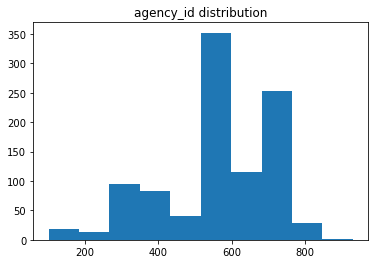

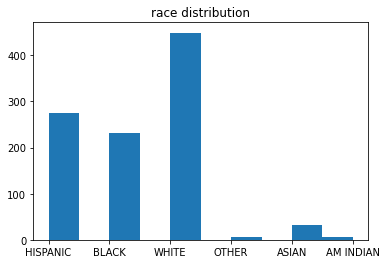

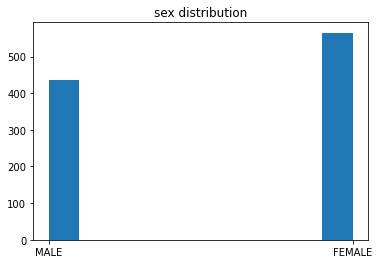

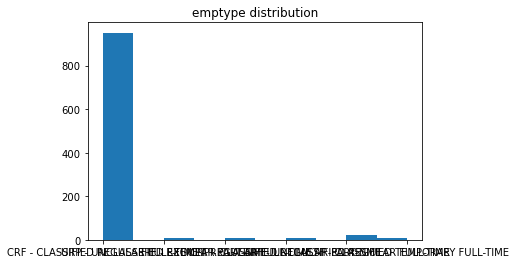

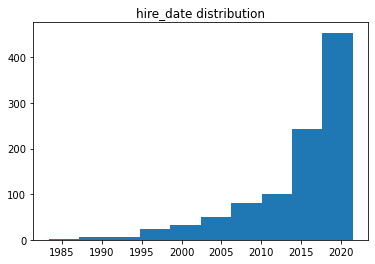

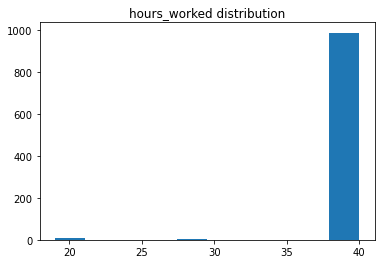

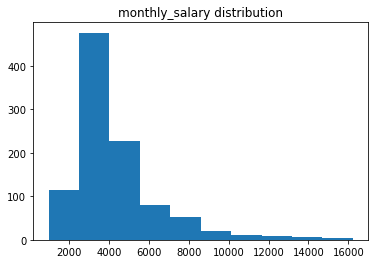

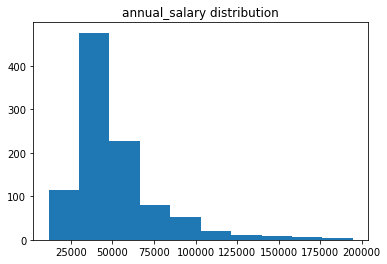

In [10]:
sample = df.drop(columns = ['agency', 'lastname', 'firstname', 'title']).sample(1000)

for col in sample.columns:
        plt.hist(sample[col])
        plt.title(f"{col} distribution")
        plt.show()

In [11]:
column = df.drop(columns = ['agency']).sample(1000).columns

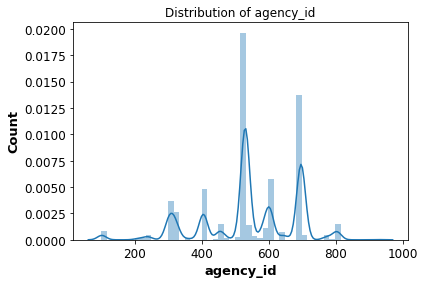

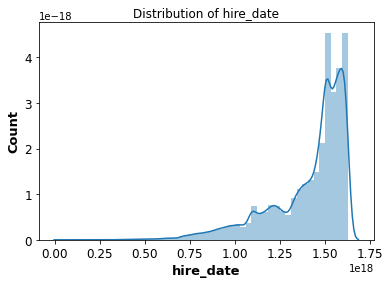

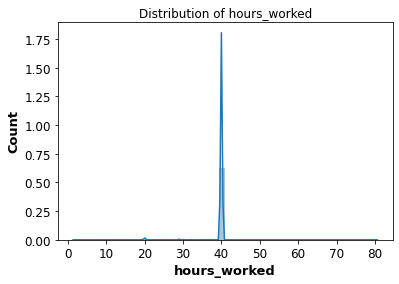

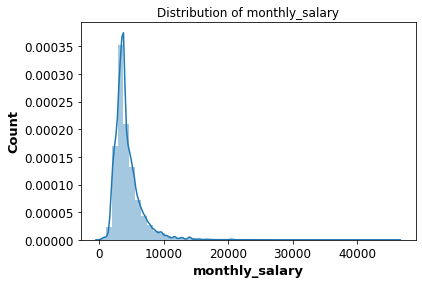

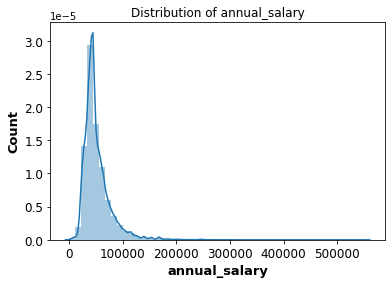

In [12]:
# sample = df.sample(1000)

for i in column:
        if df[i].dtypes != 'object':
            sns.distplot(df[i])
            plt.xticks(fontsize= 12)
            plt.yticks(fontsize=12)
            plt.ylabel("Count", fontsize= 13, fontweight="bold")
            plt.xlabel(i, fontsize=13, fontweight="bold")
            plt.title('Distribution of '+i)
            plt.show()

In [13]:
df.sample(5)

,agency_id,agency,lastname,firstname,title,race,sex,emptype,hire_date,hours_worked,monthly_salary,annual_salary
102408,644,TEXAS JUVENILE JUSTICE DEPARTMENT,MORENO,TORY,JUVENILE CORREC OFFCR V,HISPANIC,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,2020-02-01,40.0,3955.75,47469.00
11680,306,LIBRARY AND ARCHIVES COMMISSION,RIVERA,DIANA,EXECUTIVE ASST I,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,1992-01-14,40.0,4130.38,49564.56
95019,601,TEXAS DEPARTMENT OF TRANSPORTATION,MCMASTER,LISA,ENGINEERING TECHNICIAN I,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,2021-01-01,40.0,3000.00,36000.00
10866,305,GENERAL LAND OFFICE AND VETERAN'S LAND BOARD,BELL,NATALIE,MGR III,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,2012-04-16,40.0,7632.00,91584.00
22936,405,DEPARTMENT OF PUBLIC SAFETY,GERMO,KAREN,AUDITOR II,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,2009-08-31,40.0,5072.83,60873.96


In [14]:
df = p.create_features(df)

In [15]:
df.title.str.contains('ELECTED')

0         False
1         False
2         False
3         False
4         False
          ...  
144733    False
144734    False
144735    False
144736    False
144737    False
Name: title, Length: 144730, dtype: bool

In [16]:
df['elected_official'] = np.where(df.title.str.contains('ELECTED'), 1, 0)

In [17]:
df.head()

,agency_id,agency,lastname,firstname,title,race,sex,emptype,hire_date,hours_worked,...,is_female,is_white,is_hispanic,is_black,is_BIPOC,race_encoded,tenure_months,tenure_years,is_elected,elected_official
0,101,SENATE,GILLIAM,STACEY,LEG. OFFICIAL/ADMINISTRATOR,WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,2013-07-01,20.0,...,1,1,0,0,0,5,96,8.0,0,0
1,104,LEGISLATIVE BUDGET BOARD,GILLIAM,STACEY,COMMITTEE DIRECTOR,WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,2017-11-01,20.0,...,1,1,0,0,0,5,44,3.7,0,0
2,101,SENATE,NELSON,DAVID,LEG. OFFICIAL/ADMINISTRATOR,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,1998-12-01,20.0,...,0,1,0,0,0,5,271,22.6,0,0
3,104,LEGISLATIVE BUDGET BOARD,NELSON,DAVID,SENIOR BUDGET ADVISOR,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,2017-11-01,20.0,...,0,1,0,0,0,5,44,3.7,0,0
4,101,SENATE,ROCHA,MARIE,LEG. SERVICE/MAINTENANCE,HISPANIC,FEMALE,URF - UNCLASSIFIED REGULAR FULL-TIME,2003-05-01,41.0,...,1,0,1,0,1,3,218,18.2,0,0


In [18]:
df[df.title == 'ELECTED OFFICIAL']

,agency_id,agency,lastname,firstname,title,race,sex,emptype,hire_date,hours_worked,...,is_female,is_white,is_hispanic,is_black,is_BIPOC,race_encoded,tenure_months,tenure_years,is_elected,elected_official
89,101,SENATE,ALVARADO,CAROL,ELECTED OFFICIAL,HISPANIC,FEMALE,URF - UNCLASSIFIED REGULAR FULL-TIME,2018-12-21,40.0,...,1,0,1,0,1,3,30,2.5,1,1
117,101,SENATE,BETTENCOURT,PAUL,ELECTED OFFICIAL,WHITE,MALE,URF - UNCLASSIFIED REGULAR FULL-TIME,2015-01-13,40.0,...,0,1,0,0,0,5,78,6.5,1,1
121,101,SENATE,BIRDWELL,BRIAN,ELECTED OFFICIAL,WHITE,MALE,URF - UNCLASSIFIED REGULAR FULL-TIME,2010-07-02,40.0,...,0,1,0,0,0,5,132,11.0,1,1
122,101,SENATE,BLANCO,CESAR,ELECTED OFFICIAL,HISPANIC,MALE,URF - UNCLASSIFIED REGULAR FULL-TIME,2021-01-12,40.0,...,0,0,1,0,1,3,6,0.5,1,1
144,101,SENATE,BUCKINGHAM,DAWN,ELECTED OFFICIAL,WHITE,FEMALE,URF - UNCLASSIFIED REGULAR FULL-TIME,2017-01-10,40.0,...,1,1,0,0,0,5,54,4.5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,102,HOUSE OF REPRESENTATIVES,WALLE,ARMANDO,ELECTED OFFICIAL,HISPANIC,MALE,URF - UNCLASSIFIED REGULAR FULL-TIME,2009-01-13,40.0,...,0,0,1,0,1,3,150,12.5,1,1
1478,102,HOUSE OF REPRESENTATIVES,WHITE,JAMES,ELECTED OFFICIAL,BLACK,MALE,URF - UNCLASSIFIED REGULAR FULL-TIME,2011-01-11,40.0,...,0,0,0,1,1,2,126,10.5,1,1
1498,102,HOUSE OF REPRESENTATIVES,WILSON JR,TERRY,ELECTED OFFICIAL,WHITE,MALE,URF - UNCLASSIFIED REGULAR FULL-TIME,2017-01-10,40.0,...,0,1,0,0,0,5,54,4.5,1,1
1505,102,HOUSE OF REPRESENTATIVES,WU,EUGENE,ELECTED OFFICIAL,ASIAN,MALE,URF - UNCLASSIFIED REGULAR FULL-TIME,2013-01-08,40.0,...,0,0,0,0,1,1,102,8.5,1,1


In [19]:
df.title.value_counts()

CORREC  OFFICER IV                8753
CORREC  OFFICER V                 7350
TEXAS WORKS ADVISOR II            3812
CORREC OFFCR III                  3652
DIRECT SUPPORT PROFESSIONAL I     2483
                                  ... 
DIR, INFO SYSTEMS                    1
MANAGER PROC/DEL                     1
CHIEF INFO SECURITY OFFICER          1
INFO TECHNOLOGY SECURITY ANLYS       1
COMMISS, RIO GRANDE COMPACT          1
Name: title, Length: 1406, dtype: int64

In [20]:
df[df.title.str.contains('ELECTED')].title.value_counts()

ELECTED OFFICIALS STAFF    597
ELECTED OFFICIAL           181
Name: title, dtype: int64

Looking At Our Maximum Age and Minimum Age to Make Some Age Bins

Max: 49.8, Min: 0.0

----------------------------

Visualizing Years of Tenure Column To Help with Binning



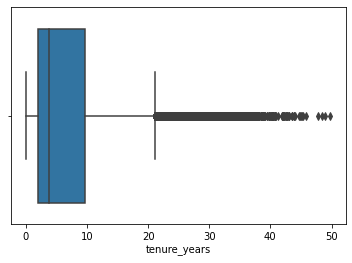


----------------------------

Looking At Our Years of Tenure Bins Value Counts
1    82166
2    27330
3    25513
4     8875
Name: tenure_years_bins, dtype: int64

----------------------------



In [22]:
df = p.make_bins_and_feats(df)

In [24]:
df.head().T

,0,1,2,3,4
agency_id,101,104,101,104,101
agency,SENATE,LEGISLATIVE BUDGET BOARD,SENATE,LEGISLATIVE BUDGET BOARD,SENATE
lastname,GILLIAM,GILLIAM,NELSON,NELSON,ROCHA
firstname,STACEY,STACEY,DAVID,DAVID,MARIE
title,LEG. OFFICIAL/ADMINISTRATOR,COMMITTEE DIRECTOR,LEG. OFFICIAL/ADMINISTRATOR,SENIOR BUDGET ADVISOR,LEG. SERVICE/MAINTENANCE
race,WHITE,WHITE,WHITE,WHITE,HISPANIC
sex,FEMALE,FEMALE,MALE,MALE,FEMALE
emptype,URP - UNCLASSIFIED REGULAR PART-TIME,URP - UNCLASSIFIED REGULAR PART-TIME,URP - UNCLASSIFIED REGULAR PART-TIME,URP - UNCLASSIFIED REGULAR PART-TIME,URF - UNCLASSIFIED REGULAR FULL-TIME
hire_date,2013-07-01 00:00:00,2017-11-01 00:00:00,1998-12-01 00:00:00,2017-11-01 00:00:00,2003-05-01 00:00:00
hours_worked,20.0,20.0,20.0,20.0,41.0


In [25]:
df.dtypes

agency_id                     int64
agency                       object
lastname                     object
firstname                    object
title                        object
race                         object
sex                          object
emptype                      object
hire_date            datetime64[ns]
hours_worked                float64
monthly_salary              float64
annual_salary               float64
is_female                     int64
is_white                      int64
is_hispanic                   int64
is_black                      int64
is_BIPOC                      int64
race_encoded                  int64
tenure_months                 int64
tenure_years                float64
is_elected                    int64
elected_official              int64
tenure_years_bins          category
0-5_years                     int64
5-10_years                    int64
10-20_years                   int64
>20_years                     int64
dtype: object